Este notebook trata el problema del faro. Tenemos un faro ubicado a una distance $(\beta,\alhpa)$ kms de la costa (perpendicular, horizonal), el cual emite destellos muy colimados de luz de manera aleatoria. En la costa (asumida recta) hay una serie de detectores de luz que detectan donde llega un destello pero no el angulo del que vienen. Dado un set de destellos detectados en la costa ${x_k}_{k=1}^{N}$, y asumiendo que $\beta=1$ 

In [13]:
import numpy as np
from numpy.random import binomial
from scipy.stats import cauchy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
beta=1
def prior(alpha):
    return 1
def log_like(data,alpha):
    n = data.shape[0]
    ll = 0
    for i in range(n):
        ll -= np.log(beta**22 + (data[i]-alpha)**2)
    return ll    

In [14]:
sim_data = cauchy.rvs(loc=1,scale=1,size=1028)

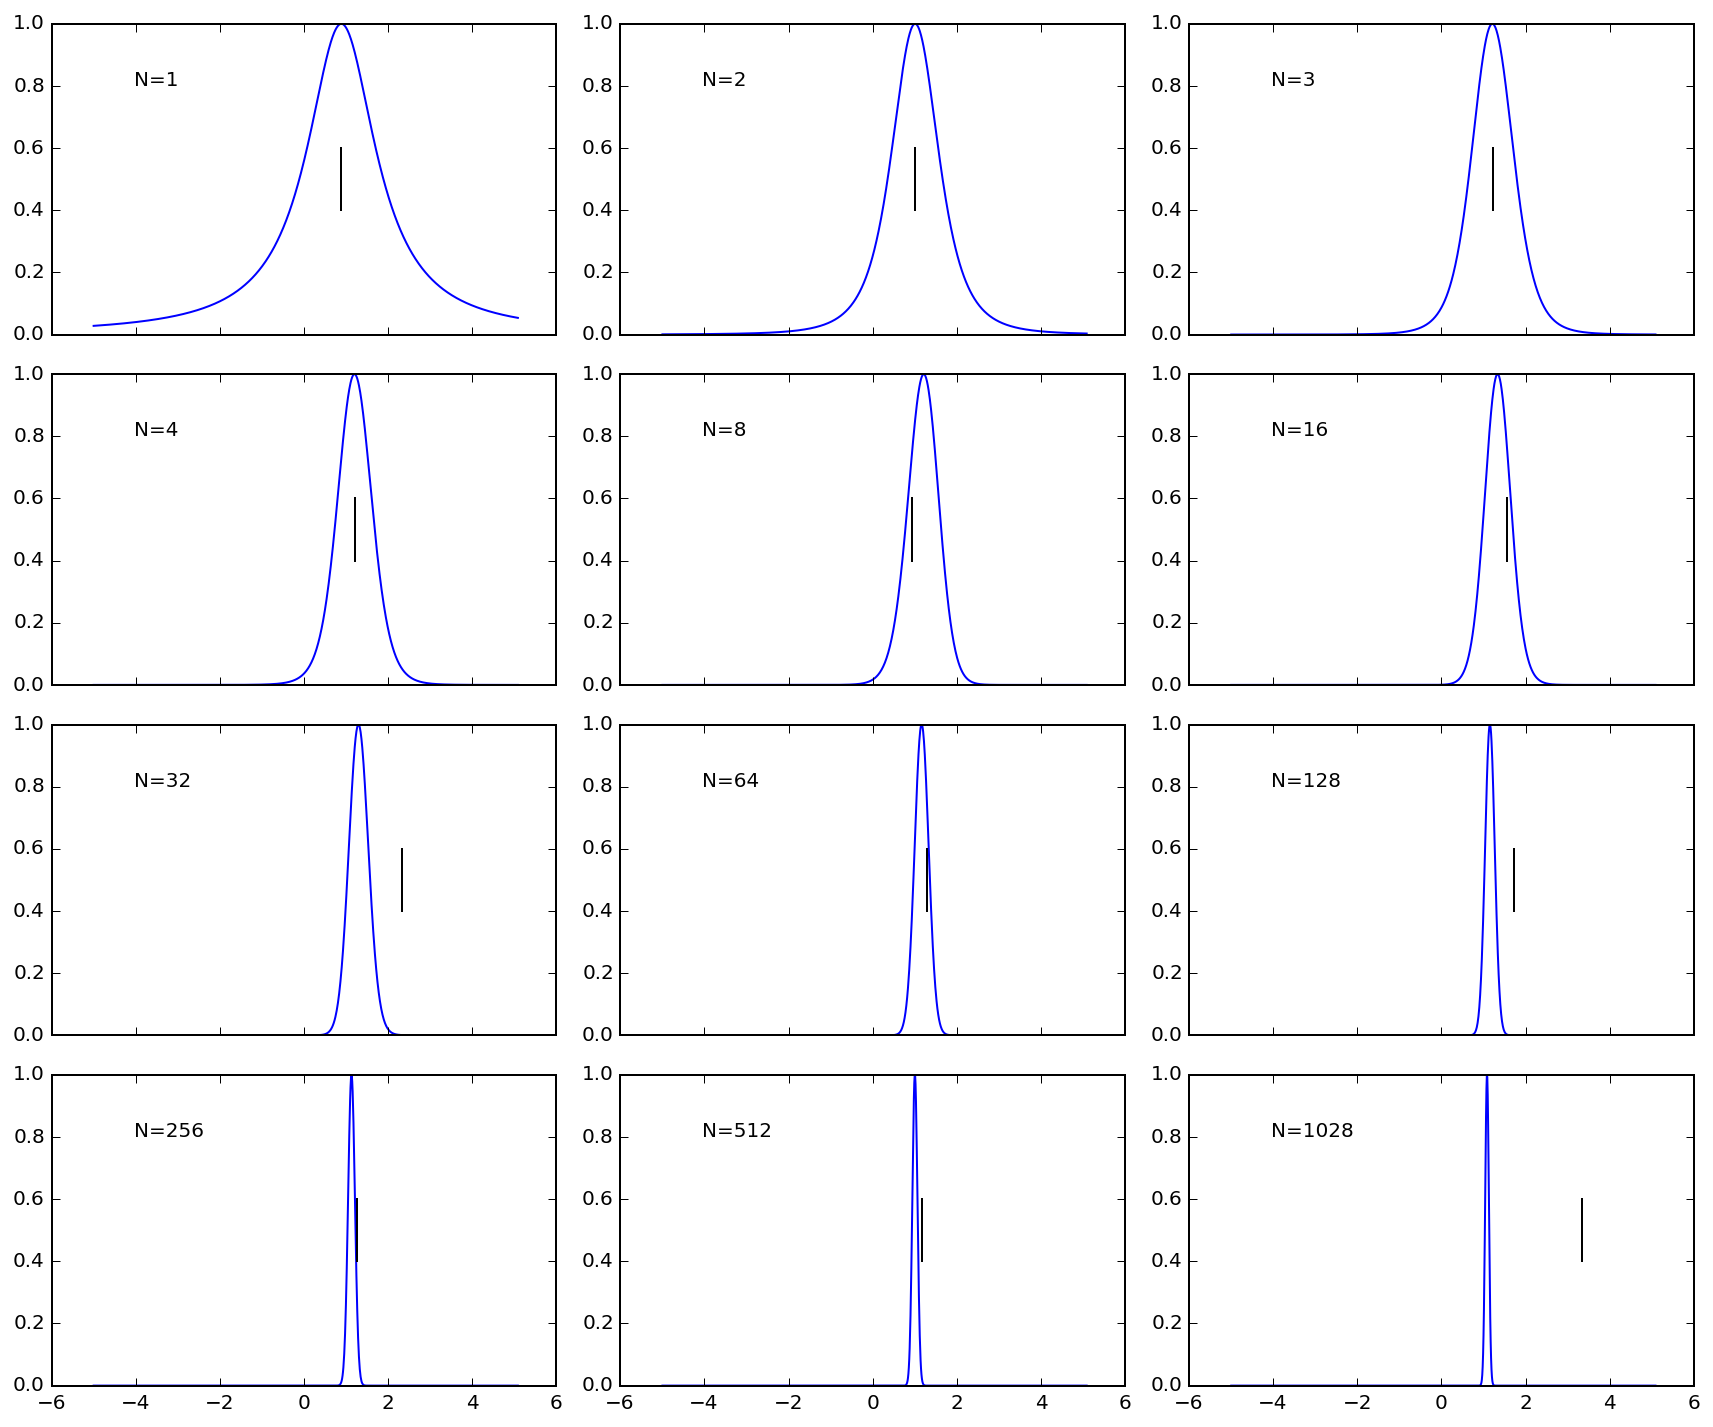

In [18]:
sizes = np.array([1,2,3,4,8,16,32,64,128,256,512,1028])
fig, ax = plt.subplots(ncols=3,nrows=4,sharex=True,figsize=[4*3,2.5*4])
xplot = np.arange(-5,5.1,0.01)
i=j=0
for s in sizes:
    ll = log_like(sim_data[:s],xplot)
    ll -= ll.max()
    likelihood = np.exp(ll)
    posterior = prior(xplot) * likelihood
    ax[j,i].plot(xplot,posterior)
    ax[j,i].annotate('N='+str(s), xy=(-4, 0.8))
    m = sim_data[:s].mean()
    ax[j,i].plot((m, m), (0.4, 0.6), 'k-')
    i = i+1
    if (i > 2):
        i=0
        j=j+1
fig.tight_layout()